In [82]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return 3*x**2 - 4*x+5

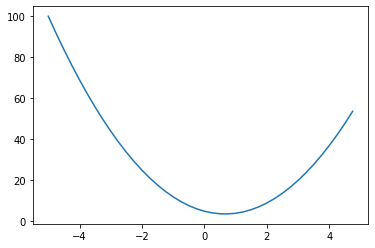

In [3]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [4]:
# derivative at 2/3
h = 0.001
x = 2/3
(f(x+h) - f(x))/h

0.0029999999995311555

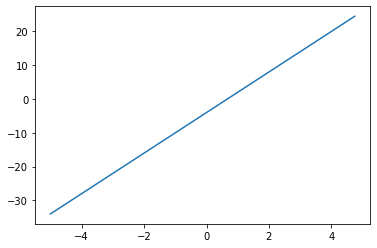

In [5]:
def d():
    ds = []
    h = 0.001
    for i in range(len(ys)):
        ds.append((f(xs[i]+h) - f(xs[i]))/h)
    return ds
ds=d()
plt.plot(xs, ds)

In [6]:
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
a += h
d2 = a*b + c

print(f"d1 {d1}")
print(f"d2 {d2}")
print(f"slope", (d2 - d1)/h)

d1 4.0
d2 3.997
slope -3.0000000000001137


In [134]:
class Value:

    def __init__(self, data, _children=(), _op='', label=""):
        self.data = data
        self.grad = 0.0
        self._backward = lambda:None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return (f"Value(data) = {self.data}")

    def __add__(self, other):
        out = Value(self.data+ other.data, (self,other), _op="+")
        def _backward():
            self.grad = 1.0*out.grad
            other.grad = 1.0*out.grad
        out._backward = _backward
        return out
    # def __sub__(self,other):
    #     out = Value(self.data-other.data,(self,other),_op="-")
    #     return out
    # def __div__(self,other):
    #     out = Value(self.data/other.data,(self,other),_op="/")
    #     return out

    def __mul__(self, other):
        out = Value(self.data * other.data,(self, other), _op="*")
        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad
        out._backward = _backward
        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x)-1)/(math.exp(2*x) + 1)
        out=Value(t, (self,), 'tanh')
        def _backward():
            self.grad = (1 - t**2) * out.grad
        out._backward = _backward
        return out

In [118]:
a = Value(2.1, label="a")
b = Value(5, label="b")
c = Value(10, label="c")
d = a * b + c
d._prev

{Value(data)=10, Value(data)=10.5}

In [9]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot


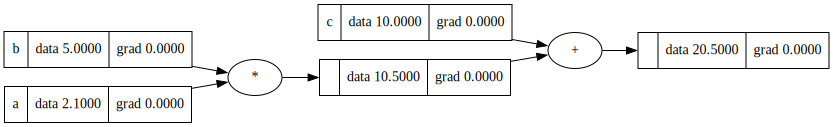

In [10]:
# download link for graphwiz on windows: https://graphviz.org/download
import os
os.environ["PATH"] += os.pathsep + 'F:\\softwares\\Graphviz\\bin'
draw_dot(d)

In [66]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L


Value(data)=-8.0

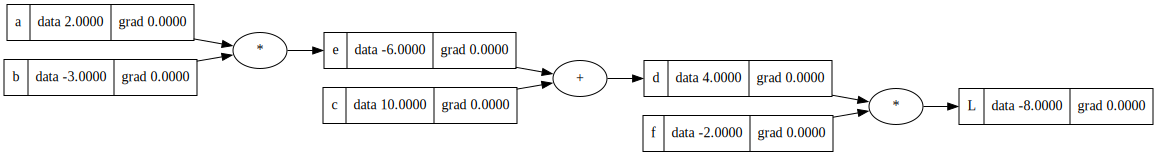

In [67]:
draw_dot(L)

In [68]:
# Manual Gradients
"""

From mulitvar caluclus

dl/dd=f
dl/df=d

dd/de=d
dd/dc=d

da/de=b
db/de=a



dl/dc=dl/df*df/dc
dl/de=dl/df*df/de

dl/da=dl/de*/de/da
dl/db=dl/de*/de/db

"""
L.grad=1
d.grad=f.data
f.grad=d.data
c.grad=d.grad
e.grad=d.grad
a.grad=b.data*e.grad
b.grad=a.data*e.grad

In [38]:
def gc():
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'

    L1=L.data
    h=.0001
    a = Value(2.0+h, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L2=L.data
    print((L2-L1)/h)
gc()


6.000000000021544


In [78]:
a.data+=0.01*a.grad
b.data+=0.01*b.grad
c.data+=0.01*c.grad
f.data+=0.01*f.grad
print(a,b,c,f)
e=a*b
d=e+c
L=d*f

print(L.data)

Value(data)=2.6000000000000005 Value(data)=-3.4000000000000004 Value(data)=9.800000000000004 Value(data)=-1.5999999999999996
-1.536000000000001


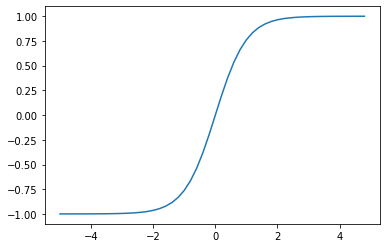

In [80]:
plt.plot(np.arange(-5,5,0.2),np.tanh(np.arange(-5,5,0.2)))#activation function

In [137]:
#inputs
x1=Value(2.0,label='x1')
x2=Value(0.0,label='x2')
#weights
w1=Value(-3.0,label='w1')
w2=Value(1.0,label='w1')
#bias of the neuron this specific number for numbers comming out nicely
b=Value(6.8813735870195432,label='b')
# x1*w1+x2+w2+b
x1w1=x1*w1;x1w1.label='x1w1'
x2w2=x2*w2;x2w2.label='x2w2'

x1w1x2w2=x1w1+x2w2;x1w1x2w2.label="x1w1+x2w2"
n=x1w1x2w2+b;n.label='n'
o=n.tanh();o.label='o'


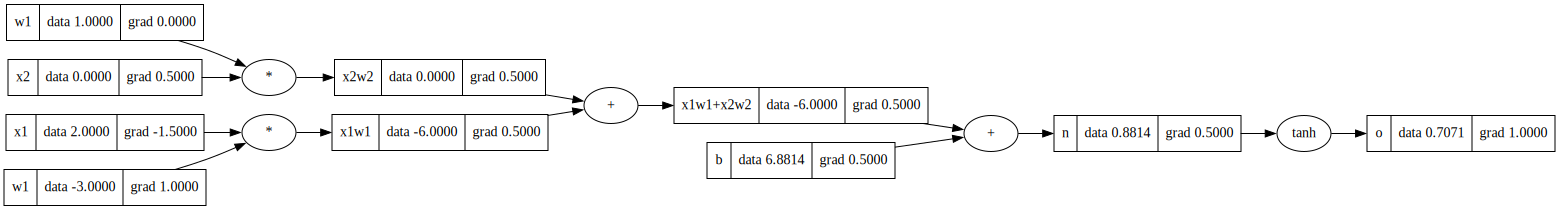

In [145]:
draw_dot(o)

In [143]:
o.grad=1
o._backward()
n._backward()
x1w1x2w2._backward()
b._backward()
x2w2._backward()
x1w1._backward()

In [116]:
o.grad=1.0
n.grad=1-o.data**2
x1w1x2w2.grad=n.grad
b.grad=n.grad
x1w1.grad=x1w1x2w2.grad
x2w2.grad=x1w1x2w2.grad
x1.grad=w1.data*x1w1.grad
x2.grad=w2.data*x2w2.grad

In [93]:
# o=tanh(n)
#do/dn=1-tanh^2
#do/dn=1-o^2
